In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D  
from keras.layers import MaxPooling2D   
from keras.layers import Flatten        
from keras.layers import Dense  
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_dir = r'C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\train'
test_dir = r'C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test'

Found 585 images belonging to 3 classes.
Found 193 images belonging to 3 classes.
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4142 - loss: 2.0635 - val_accuracy: 0.7876 - val_loss: 0.4914
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 842ms/step - accuracy: 0.8009 - loss: 0.4591 - val_accuracy: 0.8187 - val_loss: 0.4415
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8748 - loss: 0.2699 - val_accuracy: 0.9067 - val_loss: 0.2761
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9381 - loss: 0.2037 - val_accuracy: 0.8031 - val_loss: 0.6180
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8910 - loss: 0.2478 - val_accuracy: 0.9275 - val_loss: 0.1929
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9688 - loss: 0.1273 - val_accuracy: 0.9482 - val_loss: 0.2100
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 949ms/step - accuracy: 0.9747 - loss: 0.0974 - val_accuracy: 0.9534 - val_loss: 0.2369
Epoch 8/10
19/19 ━━━━━━━━━━━━━

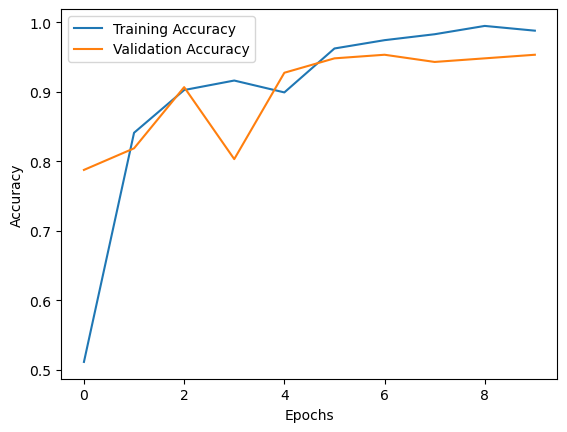

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.25)


training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    subset="training",
    class_mode="categorical",
)

validation_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    subset="validation",
    class_mode="categorical",
)





In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(training_set.num_classes, activation="softmax"),
])




In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=validation_set)


In [43]:
loss, accuracy = model.evaluate(validation_set)
print(f"Validation accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9737 - loss: 0.1094
Validation accuracy: 0.9689119458198547


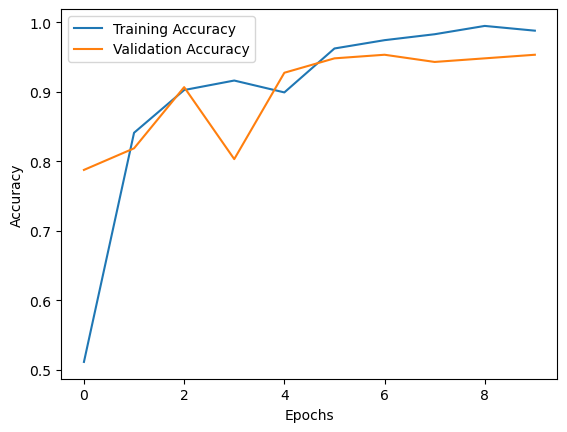

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [10]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


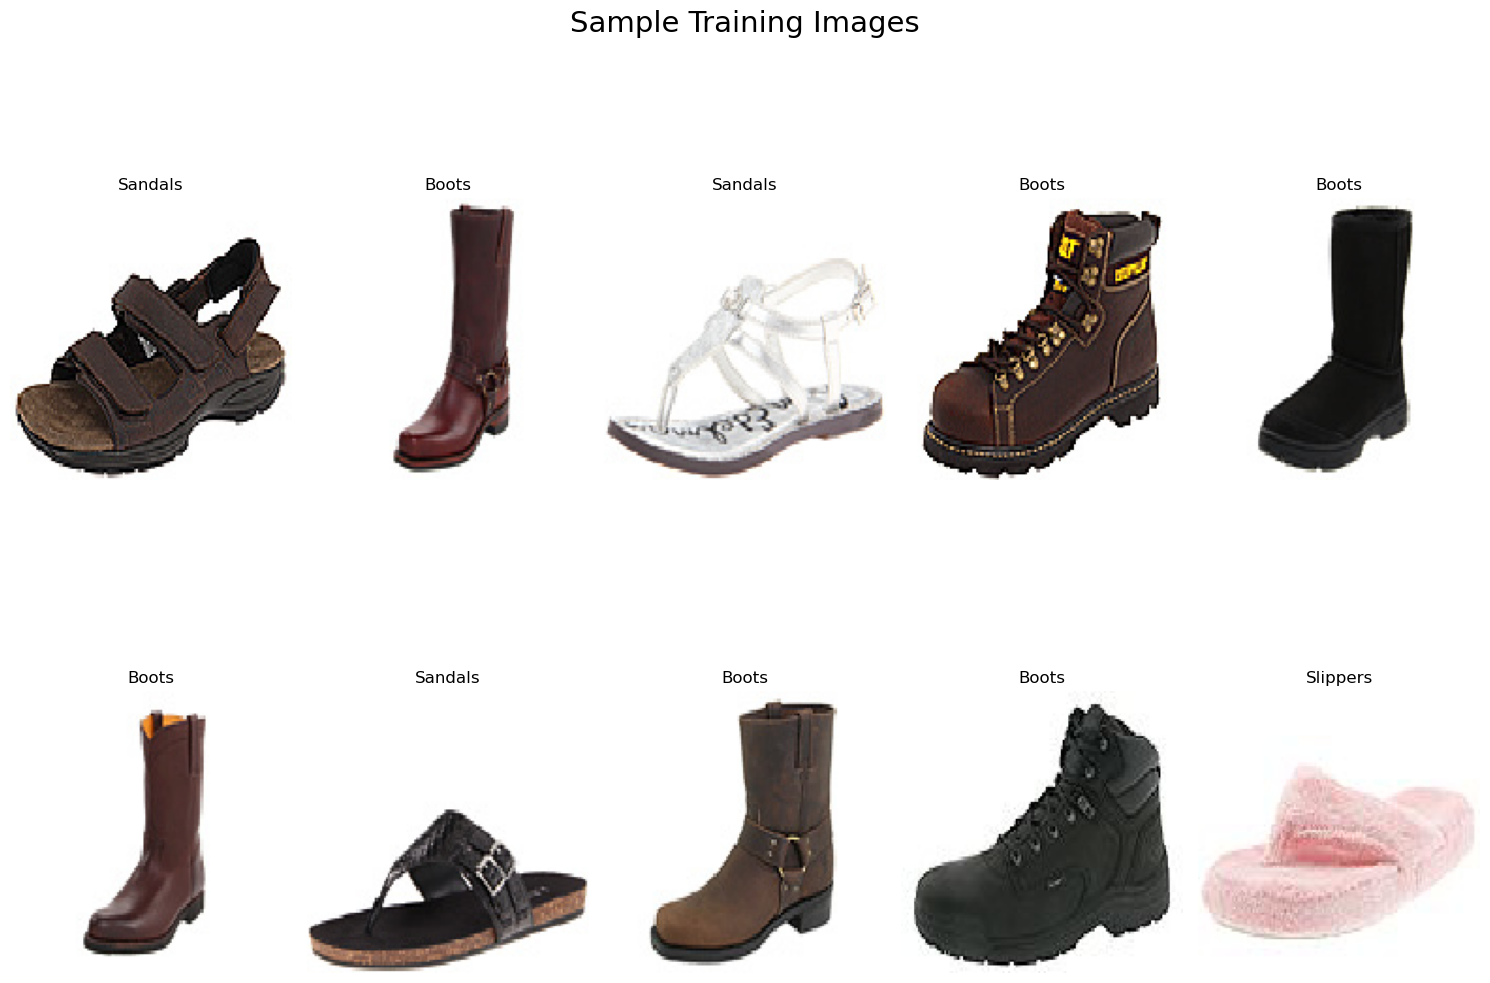

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [12]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 3)


In [13]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,195 (2.00 MB)

 Trainable params: 524,195 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
result = model.fit(validation_set,
                   validation_data=validation_set, 
                   epochs=12)

Epoch 1/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.8754 - loss: 0.2665 - val_accuracy: 0.9430 - val_loss: 0.2316
Epoch 2/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.8837 - loss: 0.2859 - val_accuracy: 0.9223 - val_loss: 0.2109
Epoch 3/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.8916 - loss: 0.2632 - val_accuracy: 0.9223 - val_loss: 0.2664
Epoch 4/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.8724 - loss: 0.2498 - val_accuracy: 0.9171 - val_loss: 0.2790
Epoch 5/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.9054 - loss: 0.2532 - val_accuracy: 0.8756 - val_loss: 0.2556
Epoch 6/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.8654 - loss: 0.3270 - val_accuracy: 0.9534 - val_loss: 0.1787
Epoch 7/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.9364 - loss: 0.1596 - val_accuracy: 0.9430 - val_loss: 0.1447
Epoch 8/12
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 482ms/step - accuracy: 0.9259 - loss: 0.1938 - val_accuracy: 0.9534 - val_loss:

In [18]:
model.save('shoe_classifier.h5')

In [21]:
pip install keras-preprocessing


   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   -------------------------------------- - 41.0/42.6 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- - 41.0/42.6 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 207.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from keras_preprocessing import image


In [23]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [24]:
new_model = load_model("shoe_classifier.h5")

In [31]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [33]:
import os 
os.chdir(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test")

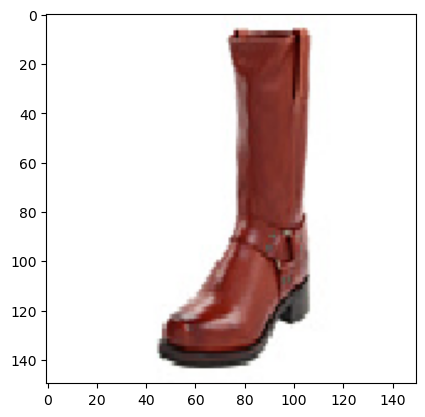

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [34]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (2).jpg")

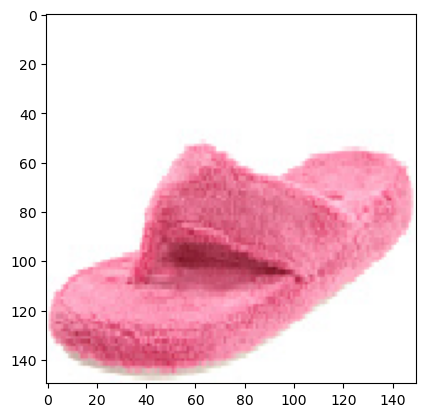

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction is Slippers.
[[0. 0. 1.]]



In [35]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (36).jpg")

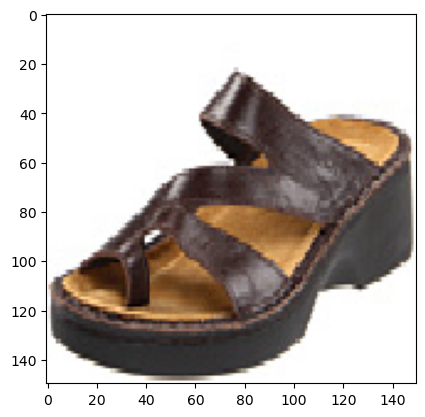

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction is Sandal.
[[0. 1. 0.]]



In [36]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (17).jpg")

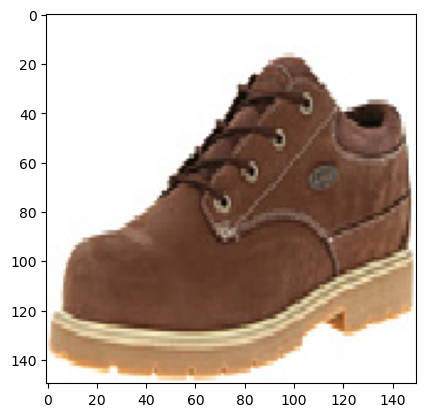

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [44]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (22).jpg")

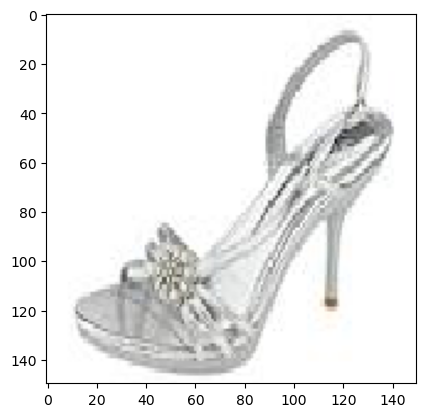

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction is Sandal.
[[0. 1. 0.]]



In [45]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (54).jpg")

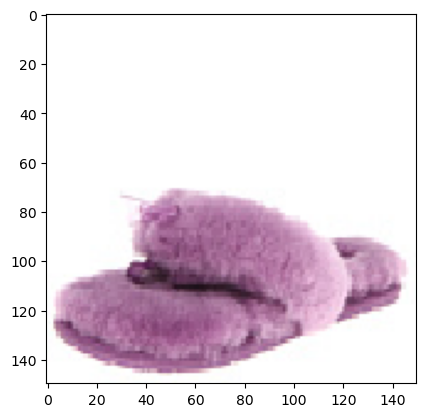

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction is Slippers.
[[0.0000000e+00 1.0207688e-10 1.0000000e+00]]



In [46]:
model_output(r"C:\Users\pc\Downloads\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\CNN\Shoe Classification\test\image (89).jpg")

In [41]:
score = model.evaluate(training_set,verbose=0)
print("----------------------------------Accuracy and loss of model-----------------------------------------")
print('Train Loss : ',score[0])
print('Train Accuracy :' ,score[1])

----------------------------------Accuracy and loss of model-----------------------------------------
Train Loss :  0.39809510111808777
Train Accuracy : 0.8410256505012512


In [50]:
score = model.evaluate(training_set,verbose=2)
print("----------------------------------Accuracy and loss of model-----------------------------------------")
print('Train Loss : ',score[0])
print('Train Accuracy :' ,score[1])

19/19 - 1s - 78ms/step - accuracy: 0.8410 - loss: 0.3981
----------------------------------Accuracy and loss of model-----------------------------------------
Train Loss :  0.39809513092041016
Train Accuracy : 0.8410256505012512


In [39]:
score = model.evaluate(training_set, verbose=0)
print("----------------------------------Accuracy and loss of model-----------------------------------------")
print('Train Loss:', score[0])
print('Train Accuracy:', score[1] * 100) 


----------------------------------Accuracy and loss of model-----------------------------------------
Train Loss: 0.3980950713157654
Train Accuracy: 84.10256505012512


In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_set = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_set = validation_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_set,
    epochs=50,
    validation_data=validation_set,
    callbacks=[early_stopping]
)


Found 778 images belonging to 3 classes.
Found 778 images belonging to 3 classes.
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.4249 - loss: 18.7396 - val_accuracy: 0.4190 - val_loss: 1.7764
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5770 - loss: 1.7855 - val_accuracy: 0.2943 - val_loss: 1.1958
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6186 - loss: 0.8266 - val_accuracy: 0.3985 - val_loss: 1.1649
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6158 - loss: 0.8145 - val_accuracy: 0.3728 - val_loss: 1.0495
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7575 - loss: 0.6711 - val_accuracy: 0.4165 - val_loss: 0.9922
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7116 - loss: 0.6646 - val_accuracy: 0.4512 - val_loss: 0.9609
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7485 - loss: 0.6291 - val_accuracy: 0.2211 - val_loss: 1.2599
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━